##### **Business**: Healthcare
##### **Goal**: Disease Prediction and Health Analysis
##### **Skill**: Exploratory Data Analysis (EDA)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Multiple_disease_dataset.csv")
df

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet
0,69,Male,175,289,133,90,Pain,Heart Disease,"Aspirin, Beta-blockers","Low-sodium, high-fiber diet"
1,32,Male,110,290,117,81,"Fatigue, Cough",Flu,Oseltamivir,"Hydration, Vitamin C-rich foods"
2,89,Male,91,221,85,119,Fatigue,Healthy,NaN,Balanced diet with all nutrients
3,78,Female,136,274,183,107,Pain,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
4,38,Male,119,209,95,89,"Fatigue, Cough, Pain",Flu,Oseltamivir,"Hydration, Vitamin C-rich foods"
...,...,...,...,...,...,...,...,...,...,...
6995,38,Female,96,222,193,106,"Fatigue, Cough",Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
6996,75,Male,164,161,89,67,Cough,Heart Disease,"Aspirin, Beta-blockers","Low-sodium, high-fiber diet"
6997,35,Female,101,181,104,86,Pain,Healthy,NaN,Balanced diet with all nutrients
6998,89,Male,149,232,166,96,"Fatigue, Cough",Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"


## EDA
* Overview EDA is used to understand the structure and trends within medical data.

* Two main approaches:

    * Statistical Analysis: Descriptive statistics (mean, median, etc.)

    * Visual Analysis: Plots to find patterns, trends, and correlations

# TOC 

* 0. Data
* 1. Data Validation and Normalization
* 2. EDA
    * 2.1 Analysis
        * 2.1.1 Univariate Analysis
        * 2.1.2 Bivariate Analysis
        * 2.1.3 Multivariate Analysis

### 0. Data

Columns info:

**Column**|**Description**
---------------|----------
**age**|Age of the patient
**gender**|Gender of the patient (Male/Female)
**blood_pressure**|Blood pressure level
**cholesterol**|Cholesterol level
**blood_sugar**|Blood sugar level
**heart_rate**|Heart rate (bpm)
**symptoms**|Reported symptoms (e.g., Fatigue, Pain)
**Disease**|Diagnosed disease (e.g., Diabetes, Flu)
**Medication**|Prescribed medications
**Nutrition_Diet**|Recommended dietary plan

In [254]:
cat_cols=df.select_dtypes(exclude='number')
for i in cat_cols:
    print(df[i].value_counts())
    print("*"*100)

gender
Male      4386
Female    2614
Name: count, dtype: int64
****************************************************************************************************
symptoms
Fatigue, Cough          921
Fatigue                 921
Fatigue, Pain           881
Fatigue, Cough, Pain    878
Cough, Pain             875
Cough                   868
Pain                    794
Name: count, dtype: int64
****************************************************************************************************
Disease
Diabetes         3276
Heart Disease    1613
Flu              1059
Healthy           843
Hypertension      209
Name: count, dtype: int64
****************************************************************************************************
Medication
Insulin, Metformin        3276
Aspirin, Beta-blockers    1613
Oseltamivir               1059
Consult Physician          209
Name: count, dtype: int64
**************************************************************************************************

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7000 non-null   int64 
 1   gender          7000 non-null   object
 2   blood_pressure  7000 non-null   int64 
 3   cholesterol     7000 non-null   int64 
 4   blood_sugar     7000 non-null   int64 
 5   heart_rate      7000 non-null   int64 
 6   symptoms        6138 non-null   object
 7   Disease         7000 non-null   object
 8   Medication      6157 non-null   object
 9   Nutrition_Diet  7000 non-null   object
dtypes: int64(5), object(5)
memory usage: 547.0+ KB


In [258]:
df.shape

(7000, 10)

In [260]:
df.columns

Index(['age', 'gender', 'blood_pressure', 'cholesterol', 'blood_sugar',
       'heart_rate', 'symptoms', 'Disease', 'Medication', 'Nutrition_Diet'],
      dtype='object')

In [262]:
df.dtypes

age                int64
gender            object
blood_pressure     int64
cholesterol        int64
blood_sugar        int64
heart_rate         int64
symptoms          object
Disease           object
Medication        object
Nutrition_Diet    object
dtype: object

## Duplicated Rows Check

In [266]:
df[df.duplicated()]

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet


## 2. EDA (Data Insights from stats methods) 

##### * To get Insights on the data we can use eda techniques,
##### * Uni-Variate Analysis (Study of single column data)
##### * Bi/Multi-Variate Analysis (Study data between two or more columns)


- **Visualizations**
   * Pictorial representation of data
         - Visual representation

**2.0 Python Libraries for Visuals**

**2.2 Analysis**

**2.2.1 Uni-Variate Analysis - Study of Individual Column data**

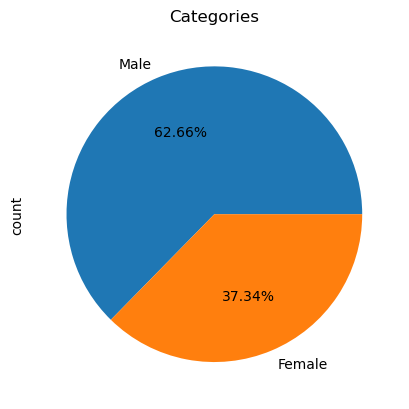

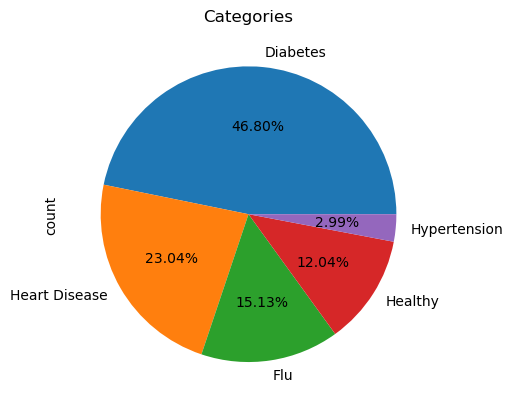

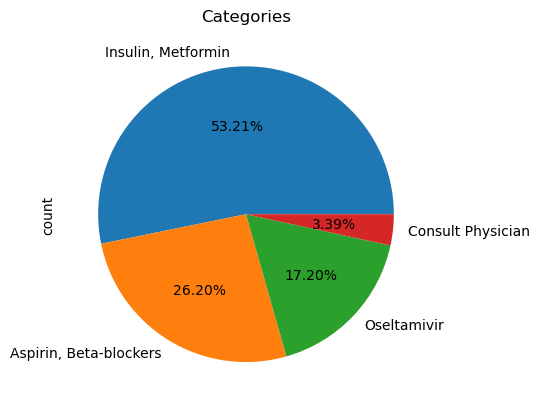

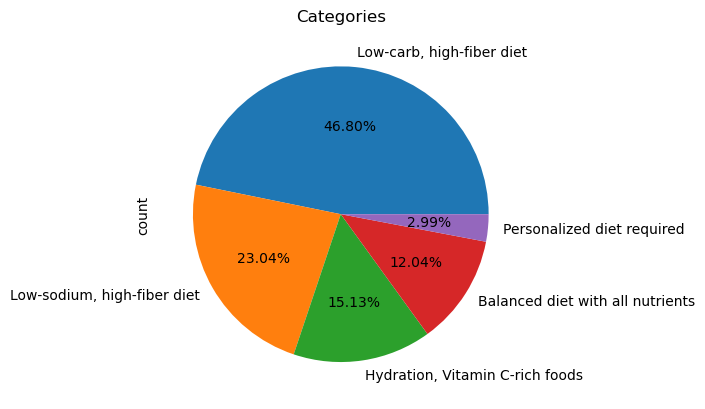

In [134]:
cat_cols = ['gender', 'Disease', 'Medication', 'Nutrition_Diet']
for col in cat_cols:
    df[col].value_counts()[:].plot.pie(autopct='%.2f%%')
    plt.title('Categories')
    plt.show()

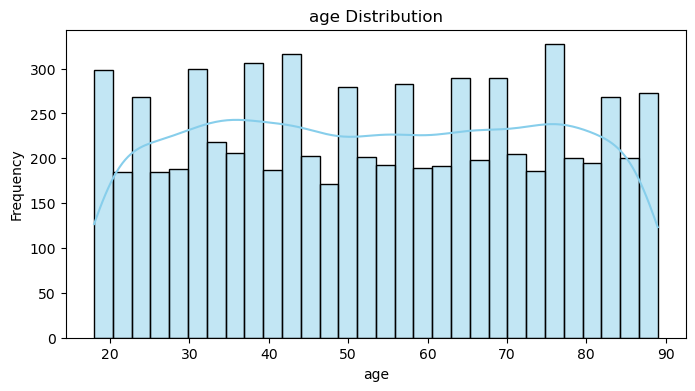

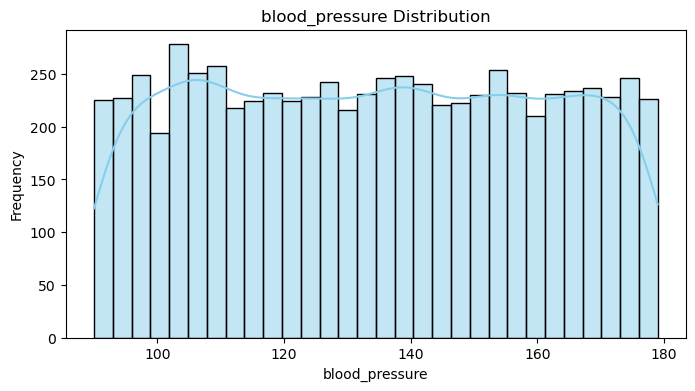

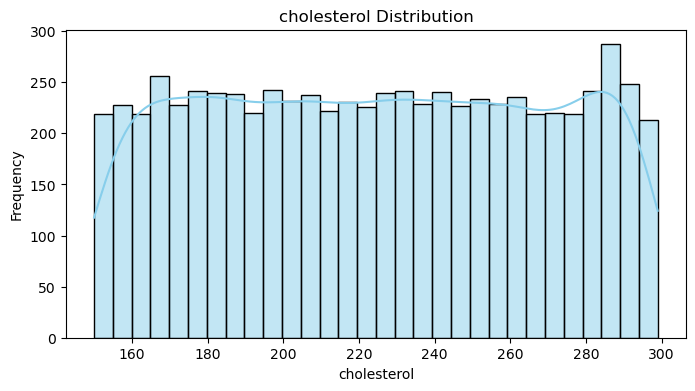

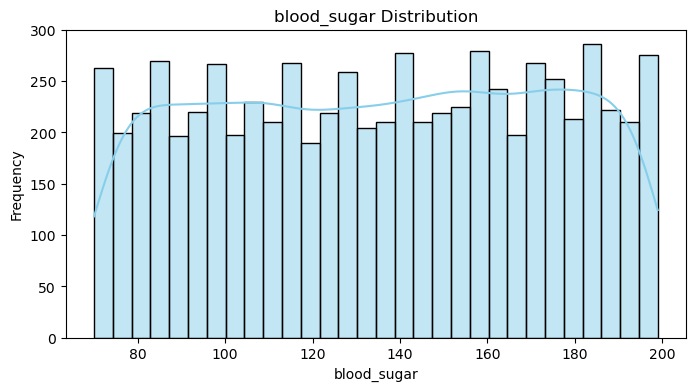

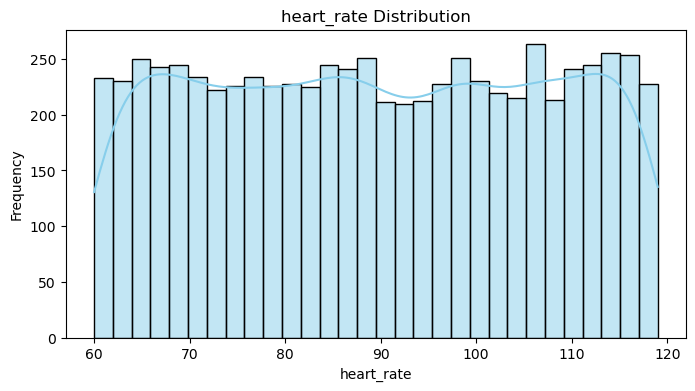

In [135]:
# Plot: Numerical Features
num_cols = ['age', 'blood_pressure', 'cholesterol', 'blood_sugar', 'heart_rate']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

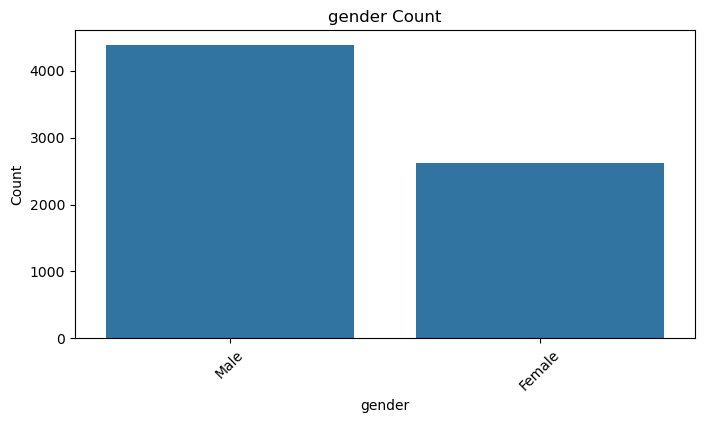

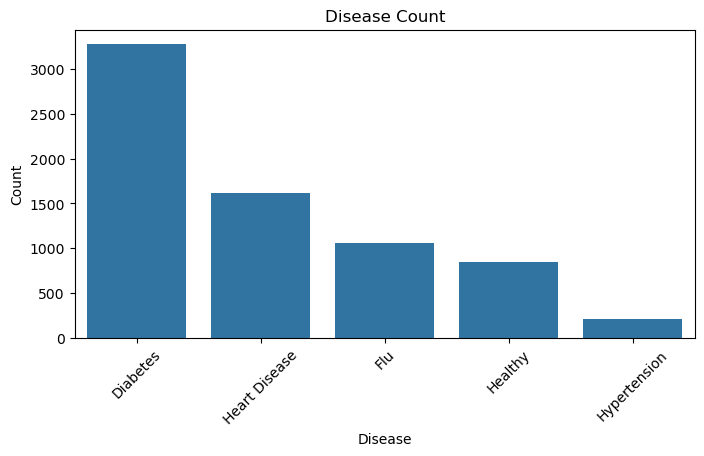

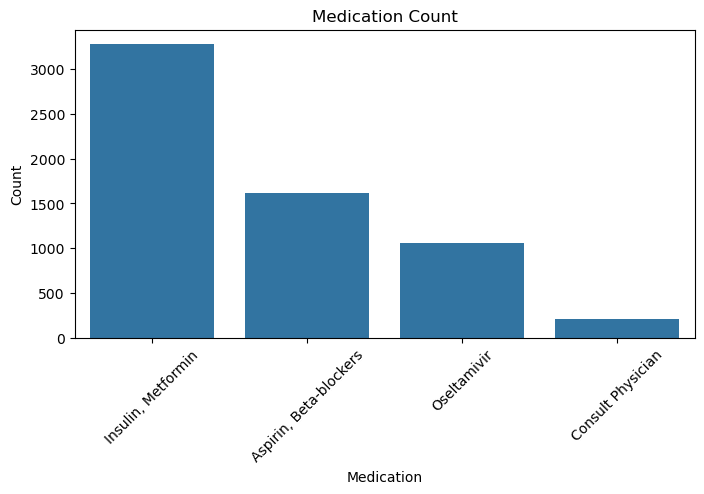

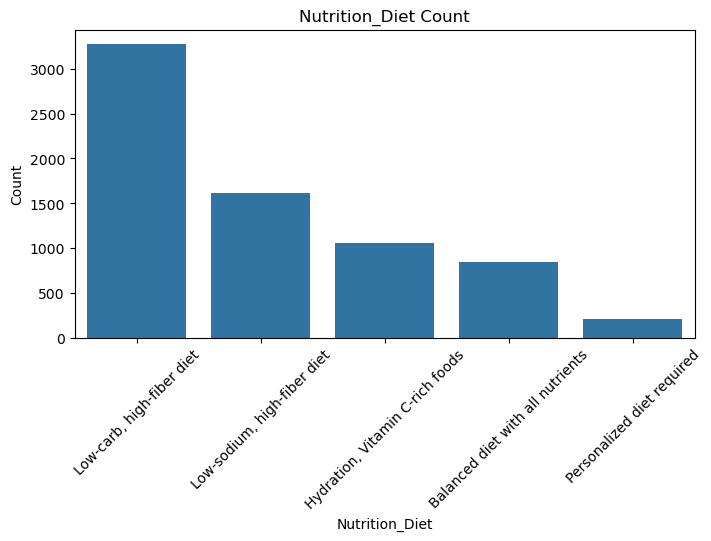

In [136]:
# Plot: Categorical Features
cat_cols = ['gender', 'Disease', 'Medication', 'Nutrition_Diet']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

### Bi-Variate

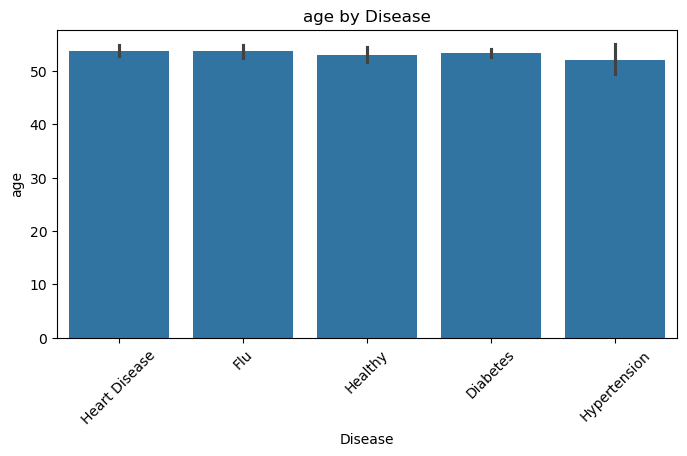

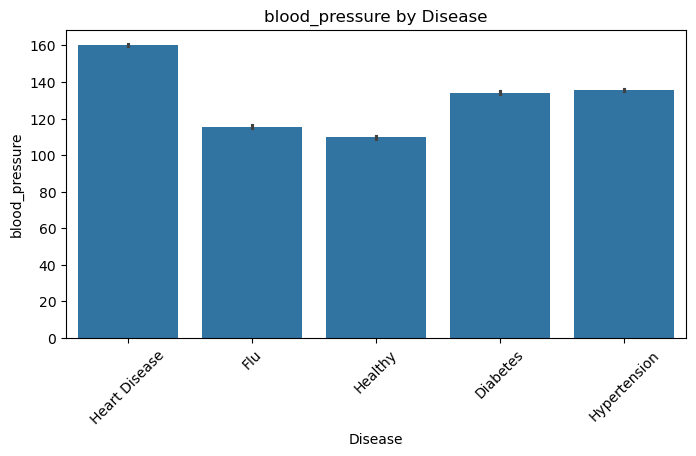

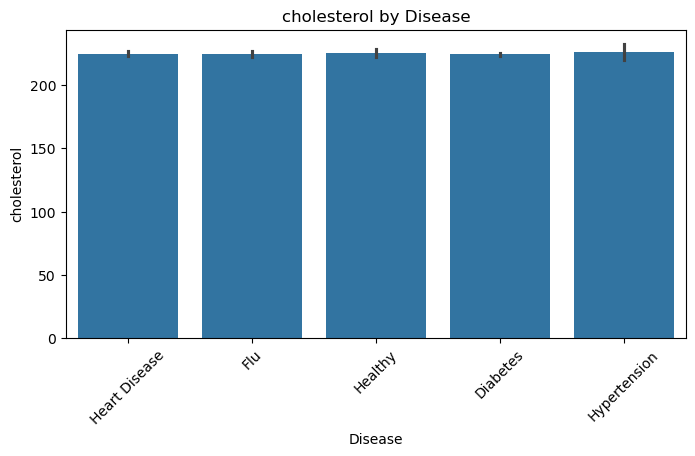

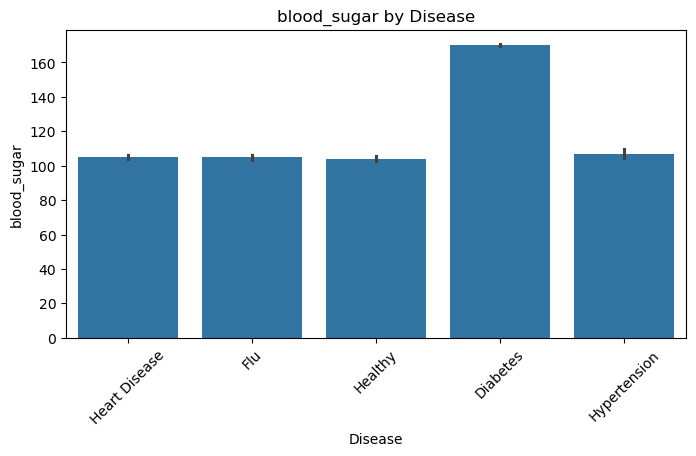

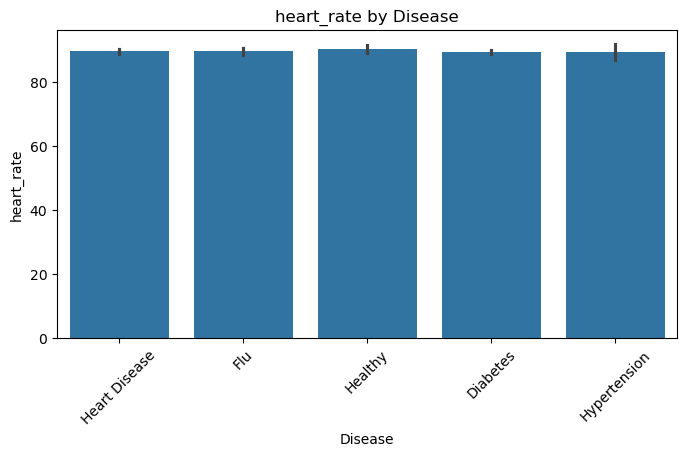

In [138]:
# Disease vs Numerical Features
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Disease', y=col, data=df)
    plt.title(f'{col} by Disease')
    plt.xticks(rotation=45)
    plt.show()

In [139]:
symptoms = df['symptoms'].str.split(',').explode().str.strip()
symptoms

0          Pain
1       Fatigue
1         Cough
2       Fatigue
3          Pain
         ...   
6997       Pain
6998    Fatigue
6998      Cough
6999    Fatigue
6999      Cough
Name: symptoms, Length: 11433, dtype: object

Text(0.5, 1.0, 'Count Plot of Disease vs symptoms')

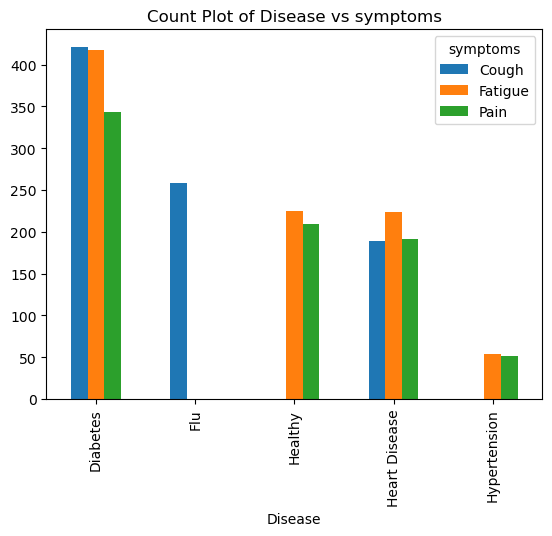

In [140]:
symptoms = df['symptoms'].str.split(',').explode().str.strip()
symptom_list = symptoms.value_counts().index

filtered_df = df[df['symptoms'].isin(symptom_list)]

crosstab =pd.crosstab(filtered_df["Disease"],filtered_df["symptoms"])
crosstab.plot(kind = "bar")
plt.title("Count Plot of Disease vs symptoms")

Text(0.5, 1.0, 'Count Plot of Disease vs Medication')

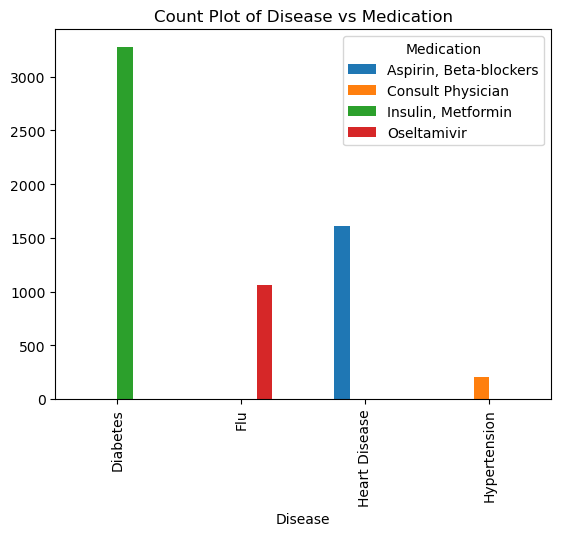

In [141]:
crosstab =pd.crosstab(df["Disease"],df["Medication"])
crosstab.plot(kind = "bar")
plt.title("Count Plot of Disease vs Medication")

Text(0.5, 1.0, 'Count Plot of Disease vs Nutrition_Diet')

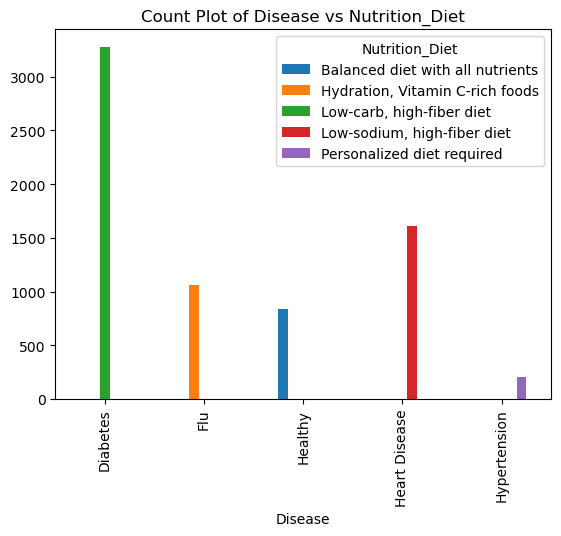

In [142]:
 crosstab =pd.crosstab(df["Disease"],df["Nutrition_Diet"])
crosstab.plot(kind = "bar")
plt.title("Count Plot of Disease vs Nutrition_Diet")

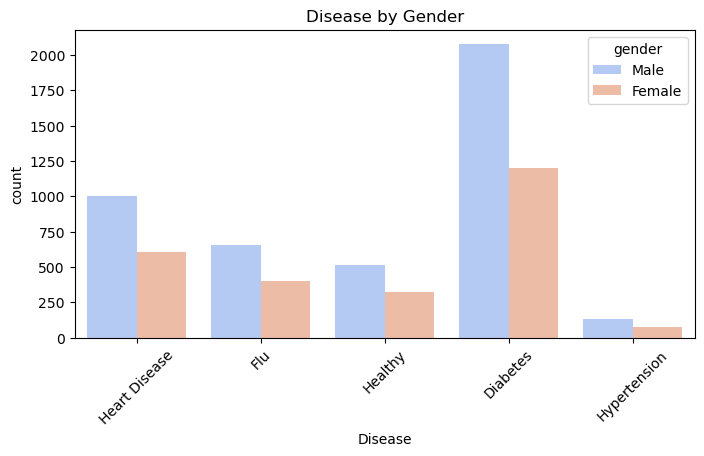

In [143]:
# Gender vs Disease
plt.figure(figsize=(8, 4))
sns.countplot(x='Disease', hue='gender', data=df, palette='coolwarm')
plt.title('Disease by Gender')
plt.xticks(rotation=45)
plt.show()

### Multi-Variate Analysis

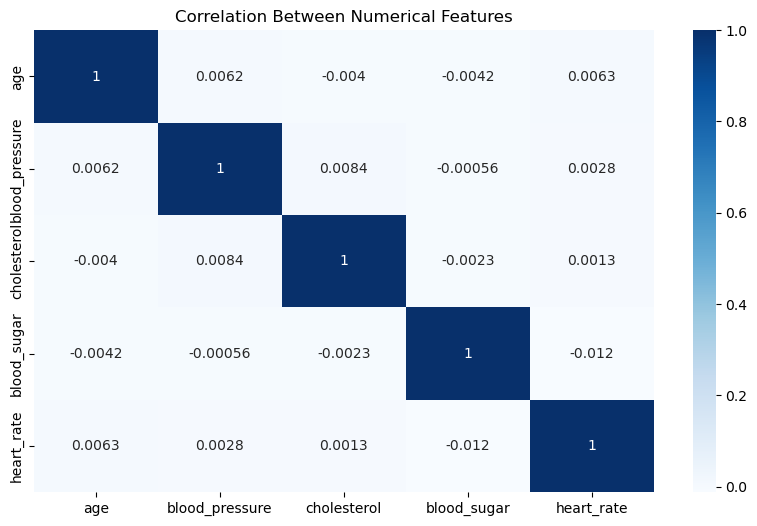

In [145]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()

In [271]:
df.isnull().sum()

age                 0
gender              0
blood_pressure      0
cholesterol         0
blood_sugar         0
heart_rate          0
symptoms          862
Disease             0
Medication        843
Nutrition_Diet      0
dtype: int64

In [273]:
df[df['symptoms'].isna()]

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet
5,41,Female,116,180,123,88,NaN,Healthy,NaN,Balanced diet with all nutrients
28,68,Female,156,294,98,102,NaN,Heart Disease,"Aspirin, Beta-blockers","Low-sodium, high-fiber diet"
31,20,Female,139,261,90,102,NaN,Hypertension,Consult Physician,Personalized diet required
33,24,Female,174,267,144,117,NaN,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
35,56,Male,92,156,106,94,NaN,Healthy,NaN,Balanced diet with all nutrients
...,...,...,...,...,...,...,...,...,...,...
6980,38,Female,113,261,171,118,NaN,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
6986,77,Male,106,222,153,102,NaN,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
6988,40,Female,120,220,135,107,NaN,Healthy,NaN,Balanced diet with all nutrients
6989,30,Female,153,274,192,111,NaN,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"


In [275]:
df[(df['Disease']=='Healthy') & df['symptoms'].isna()]

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet
5,41,Female,116,180,123,88,NaN,Healthy,NaN,Balanced diet with all nutrients
35,56,Male,92,156,106,94,NaN,Healthy,NaN,Balanced diet with all nutrients
46,25,Male,116,165,76,115,NaN,Healthy,NaN,Balanced diet with all nutrients
135,79,Female,100,267,95,93,NaN,Healthy,NaN,Balanced diet with all nutrients
138,44,Female,95,259,137,78,NaN,Healthy,NaN,Balanced diet with all nutrients
...,...,...,...,...,...,...,...,...,...,...
6674,23,Male,126,187,135,109,NaN,Healthy,NaN,Balanced diet with all nutrients
6723,18,Male,117,274,123,90,NaN,Healthy,NaN,Balanced diet with all nutrients
6905,70,Male,130,229,109,80,NaN,Healthy,NaN,Balanced diet with all nutrients
6944,48,Male,95,242,80,98,NaN,Healthy,NaN,Balanced diet with all nutrients


In [277]:
df.loc[df['Disease']=='Healthy','symptoms']=df.loc[df['Disease']=='Healthy','symptoms'].fillna("no symptoms")

In [279]:
#df[(df['Disease']!='Healthy') & df['symptoms'].isna()]

In [281]:
pd.crosstab(df['Disease'],[df['symptoms']])

symptoms,Cough,"Cough, Pain",Fatigue,"Fatigue, Cough","Fatigue, Cough, Pain","Fatigue, Pain",Pain,no symptoms
Disease,,,,,,,,
Diabetes,421,405,418,453,414,409,343,0
Flu,258,254,0,280,267,0,0,0
Healthy,0,0,225,0,0,207,209,202
Heart Disease,189,216,224,188,197,221,191,0
Hypertension,0,0,54,0,0,44,51,0


In [283]:
df.loc[df['Disease']=='Diabetes','symptoms']=df.loc[df['Disease']=='Diabetes','symptoms'].fillna('Fatigue, Cough')
df.loc[df['Disease']=='Flu','symptoms']=df.loc[df['Disease']=='Flu','symptoms'].fillna('Fatigue, Cough')
df.loc[df['Disease']=='Heart Disease','symptoms']=df.loc[df['Disease']=='Heart Disease','symptoms'].fillna('Fatigue')
df.loc[df['Disease']=='Hypertension','symptoms']=df.loc[df['Disease']=='Hypertension','symptoms'].fillna('Fatigue')


In [285]:
df[df['Disease']=='Healthy']

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet
2,89,Male,91,221,85,119,Fatigue,Healthy,NaN,Balanced diet with all nutrients
5,41,Female,116,180,123,88,no symptoms,Healthy,NaN,Balanced diet with all nutrients
9,19,Male,112,151,129,88,"Fatigue, Pain",Healthy,NaN,Balanced diet with all nutrients
23,32,Female,90,172,100,112,Fatigue,Healthy,NaN,Balanced diet with all nutrients
27,79,Male,103,291,119,83,Fatigue,Healthy,NaN,Balanced diet with all nutrients
...,...,...,...,...,...,...,...,...,...,...
6961,45,Male,103,288,83,118,Fatigue,Healthy,NaN,Balanced diet with all nutrients
6964,46,Male,106,223,79,82,Fatigue,Healthy,NaN,Balanced diet with all nutrients
6970,26,Female,93,165,92,70,Pain,Healthy,NaN,Balanced diet with all nutrients
6988,40,Female,120,220,135,107,no symptoms,Healthy,NaN,Balanced diet with all nutrients


In [287]:
df['Medication'].fillna("no need",inplace=True)

In [289]:
df['symptoms'].unique()

array(['Pain', 'Fatigue, Cough', 'Fatigue', 'Fatigue, Cough, Pain',
       'no symptoms', 'Cough', 'Cough, Pain', 'Fatigue, Pain'],
      dtype=object)

In [291]:
df["Medication"].unique()

array(['Aspirin, Beta-blockers', 'Oseltamivir', 'no need',
       'Insulin, Metformin', 'Consult Physician'], dtype=object)

In [293]:
df["Disease"].unique()

array(['Heart Disease', 'Flu', 'Healthy', 'Diabetes', 'Hypertension'],
      dtype=object)

In [295]:
df["Nutrition_Diet"].unique()

array(['Low-sodium, high-fiber diet', 'Hydration, Vitamin C-rich foods',
       'Balanced diet with all nutrients', 'Low-carb, high-fiber diet',
       'Personalized diet required'], dtype=object)

In [299]:
df

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms,Disease,Medication,Nutrition_Diet
0,69,Male,175,289,133,90,Pain,Heart Disease,"Aspirin, Beta-blockers","Low-sodium, high-fiber diet"
1,32,Male,110,290,117,81,"Fatigue, Cough",Flu,Oseltamivir,"Hydration, Vitamin C-rich foods"
2,89,Male,91,221,85,119,Fatigue,Healthy,no need,Balanced diet with all nutrients
3,78,Female,136,274,183,107,Pain,Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
4,38,Male,119,209,95,89,"Fatigue, Cough, Pain",Flu,Oseltamivir,"Hydration, Vitamin C-rich foods"
...,...,...,...,...,...,...,...,...,...,...
6995,38,Female,96,222,193,106,"Fatigue, Cough",Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"
6996,75,Male,164,161,89,67,Cough,Heart Disease,"Aspirin, Beta-blockers","Low-sodium, high-fiber diet"
6997,35,Female,101,181,104,86,Pain,Healthy,no need,Balanced diet with all nutrients
6998,89,Male,149,232,166,96,"Fatigue, Cough",Diabetes,"Insulin, Metformin","Low-carb, high-fiber diet"


In [160]:
#df1= df['symptoms'].str.split(',',expand=True)

In [161]:
# df1.fillna(0,inplace=True)
# df1.columns=['symptom_1','symptom_2','symptom_3']
# df1

In [162]:
# df=pd.concat([df.drop(columns=['symptoms']),df1],axis=1)
# df

In [301]:
df.isna().sum()

age               0
gender            0
blood_pressure    0
cholesterol       0
blood_sugar       0
heart_rate        0
symptoms          0
Disease           0
Medication        0
Nutrition_Diet    0
dtype: int64

In [303]:
df.columns

Index(['age', 'gender', 'blood_pressure', 'cholesterol', 'blood_sugar',
       'heart_rate', 'symptoms', 'Disease', 'Medication', 'Nutrition_Diet'],
      dtype='object')

In [305]:
df['gender'].replace('Male',1,inplace = True)

In [307]:
df['gender'].replace('Female',0,inplace = True)

In [309]:
df.gender

0       1
1       1
2       1
3       0
4       1
       ..
6995    0
6996    1
6997    0
6998    1
6999    1
Name: gender, Length: 7000, dtype: int64

## x & y split

In [358]:
x = df[['age', 'gender', 'blood_pressure', 'cholesterol', 'blood_sugar','heart_rate','symptoms']]

In [360]:
y = df['Disease']

In [362]:
y

0       Heart Disease
1                 Flu
2             Healthy
3            Diabetes
4                 Flu
            ...      
6995         Diabetes
6996    Heart Disease
6997          Healthy
6998         Diabetes
6999    Heart Disease
Name: Disease, Length: 7000, dtype: object

In [364]:
nd=x.select_dtypes(include='number')

In [366]:
x

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,symptoms
0,69,1,175,289,133,90,Pain
1,32,1,110,290,117,81,"Fatigue, Cough"
2,89,1,91,221,85,119,Fatigue
3,78,0,136,274,183,107,Pain
4,38,1,119,209,95,89,"Fatigue, Cough, Pain"
...,...,...,...,...,...,...,...
6995,38,0,96,222,193,106,"Fatigue, Cough"
6996,75,1,164,161,89,67,Cough
6997,35,0,101,181,104,86,Pain
6998,89,1,149,232,166,96,"Fatigue, Cough"


## Future engineering 

In [370]:
x['Cough'] = df['symptoms'].apply(lambda x : True if 'Cough' in x.split() else False)

In [372]:
x['Pain']=df['symptoms'].apply(lambda x : True if 'Pain' in x else False)

In [374]:
x['Fatigue']=df['symptoms'].apply(lambda x : True if 'Fatigue' in x else False)

In [376]:
x.drop(columns = 'symptoms',inplace = True)

In [378]:
x.columns

Index(['age', 'gender', 'blood_pressure', 'cholesterol', 'blood_sugar',
       'heart_rate', 'Cough', 'Pain', 'Fatigue'],
      dtype='object')

In [380]:
cd=x.select_dtypes(include='object')

In [382]:
# cd=pd.get_dummies(cd,dtype=int)
# cd

In [384]:
#x=pd.concat([cd,nd],axis=1)

In [386]:
x

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,Cough,Pain,Fatigue
0,69,1,175,289,133,90,False,True,False
1,32,1,110,290,117,81,True,False,True
2,89,1,91,221,85,119,False,False,True
3,78,0,136,274,183,107,False,True,False
4,38,1,119,209,95,89,False,True,True
...,...,...,...,...,...,...,...,...,...
6995,38,0,96,222,193,106,True,False,True
6996,75,1,164,161,89,67,True,False,False
6997,35,0,101,181,104,86,False,True,False
6998,89,1,149,232,166,96,True,False,True


# Model Building For Disease

In [389]:
from sklearn.model_selection import train_test_split

In [391]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 99)

In [393]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5250, 9) (1750, 9) (5250,) (1750,)


In [395]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [398]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb=XGBClassifier()
naive_bayes=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
LogisticRegression = LogisticRegression()

In [402]:
model_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []
train_auc_list = []
test_auc_list = []
fit_list = []


svc = SVC(probability=True)


models = [LogisticRegression, knn, svc, dt_model, rf_model, naive_bayes]

for model in models:
    model.fit(x_train, y_train)
    model_list.append(str(model))
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_precision_list.append(train_precision)
    test_precision_list.append(test_precision)
    
    
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_recall_list.append(train_recall)
    test_recall_list.append(test_recall)
    

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)
    

    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(x_train)
        y_test_prob = model.predict_proba(x_test)
    else:
        raise ValueError(f"Model {model} does not support probability estimates, cannot calculate ROC AUC for multiclass.")
        
    train_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr', average='macro')
    test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='macro')

    train_auc_list.append(train_auc)
    test_auc_list.append(test_auc)
    

    if train_auc < 0.6 and test_auc < 0.6:
        fit_list.append('Underfit')
    elif abs(train_auc - test_auc) <= 0.05:
        fit_list.append('Good Fit')
    else:
        fit_list.append('Overfit')

    
    print(f"Model: {model}")
    print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")
    print(f"Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}")
    print("*" * 80)


results = pd.DataFrame({
    'Model': model_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1': train_f1_list,
    'Test F1': test_f1_list,
    'Train AUC': train_auc_list,
    'Test AUC': test_auc_list,
    'Fit': fit_list
})

print(results.sort_values(by='Test AUC', ascending=False))


Model: LogisticRegression()
Train Precision: 0.5430, Test Precision: 0.5330
Train Recall: 0.5473, Test Recall: 0.5300
Train F1-Score: 0.5411, Test F1-Score: 0.5253
Train AUC: 0.9127, Test AUC: 0.9021
********************************************************************************
Model: KNeighborsClassifier()
Train Precision: 0.7990, Test Precision: 0.6134
Train Recall: 0.7101, Test Recall: 0.5867
Train F1-Score: 0.7326, Test F1-Score: 0.5936
Train AUC: 0.9758, Test AUC: 0.9130
********************************************************************************
Model: SVC(probability=True)
Train Precision: 0.6076, Test Precision: 0.6671
Train Recall: 0.5692, Test Recall: 0.5574
Train F1-Score: 0.5123, Test F1-Score: 0.5049
Train AUC: 0.9680, Test AUC: 0.9640
********************************************************************************
Model: DecisionTreeClassifier()
Train Precision: 1.0000, Test Precision: 0.8561
Train Recall: 1.0000, Test Recall: 0.8617
Train F1-Score: 1.0000, Test F1-

In [408]:
df1 = df.copy()


In [410]:
y1 = df1["Disease"]

In [412]:
x1 = x.copy()

In [414]:
y1.replace('Heart Disease',0,inplace = True)
y1.replace('Flu',1,inplace = True)
y1.replace('Healthy',2,inplace = True)
y1.replace('Diabetes',3,inplace = True)
y1.replace('Hypertension',4,inplace = True)

In [416]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.25, random_state = 99)

In [430]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(x1_train, y1_train)

train_predictions = xgb_clf.predict(x1_train)
test_predictions = xgb_clf.predict(x1_test)

train_probabilities = xgb_clf.predict_proba(x1_train)
test_probabilities = xgb_clf.predict_proba(x1_test)

train_precision = precision_score(y1_train, train_predictions, average='macro')
test_precision = precision_score(y1_test, test_predictions, average='macro')

train_recall = recall_score(y1_train, train_predictions, average='macro')
test_recall = recall_score(y1_test, test_predictions, average='macro')

train_f1 = f1_score(y1_train, train_predictions, average='macro')
test_f1 = f1_score(y1_test, test_predictions, average='macro')

train_auc = roc_auc_score(y1_train, train_probabilities, multi_class='ovr', average='macro')
test_auc = roc_auc_score(y1_test, test_probabilities, multi_class='ovr', average='macro')

print("*" * 80)
print("Model: XGboost")
print("Train Precision:" ,train_precision, "Test Precision:", test_precision)
print("Train Recall:", train_recall, "Test Recall:", test_recall)
print("Train F1-Score:", train_f1, "Test F1-Score:", test_f1)
print("Train AUC:", train_auc, "Test AUC:", test_auc)
print("*" * 80)


********************************************************************************
Model: XGboost
Train Precision: 1.0 Test Precision: 0.8730677625741372
Train Recall: 1.0 Test Recall: 0.8771636115764923
Train F1-Score: 1.0 Test F1-Score: 0.8749315911242691
Train AUC: 1.0 Test AUC: 0.991980330562418
********************************************************************************


In [190]:
df1 = df.copy()

In [191]:
y1 = df1["Disease"]

In [192]:
x1 = x.copy()

In [193]:
y1.replace('Heart Disease',0,inplace = True)
y1.replace('Flu',1,inplace = True)
y1.replace('Healthy',2,inplace = True)
y1.replace('Diabetes',3,inplace = True)
y1.replace('Hypertension',4,inplace = True)


In [194]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.25, random_state = 99)

In [195]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)


y_train_pred = xgb.predict(x1_train)
y_test_pred = xgb.predict(x1_test)


y_train_proba = xgb.predict_proba(x1_train)
y_test_proba = xgb.predict_proba(x1_test)


train_precision = precision_score(y1_train, y1_train_pred, average='macro')
test_precision = precision_score(y1_test, y1_test_pred, average='macro')


train_recall = recall_score(y1_train, y1_train_pred, average='macro')
test_recall = recall_score(y1_test, y1_test_pred, average='macro')


train_f1 = f1_score(y1_train, y1_train_pred, average='macro')
test_f1 = f1_score(y1_test, y1_test_pred, average='macro')


train_auc = roc_auc_score(y1_train, y_train_proba, multi_class='ovr', average='macro')
test_auc = roc_auc_score(y1_test, y_test_proba, multi_class='ovr', average='macro')


print("XGBoost Model Results")
print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")
print(f"Train AUC-ROC: {train_auc:.4f}, Test AUC-ROC: {test_auc:.4f}")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['Diabetes' 'Flu' 'Healthy' 'Heart Disease' 'Hypertension']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_clf.fit(x1_train, y1_train)


train_predictions = xgb_clf.predict(x1_train)
test_predictions = xgb_clf.predict(x1_test)


print("Confusion Matrix:\n", confusion_matrix(y1_test, test_predictions))
print("\nClassification Report:\n", classification_report(y1_test, test_predictions))


In [ ]:
df.info()

In [ ]:
import pickle as pkl
with open("Disease_model.pkl", "wb") as f:
    pkl.dump(rf, f)

## medicine prediction model

In [432]:
a=pd.get_dummies(df["Disease"],dtype=int)
a

,Diabetes,Flu,Healthy,Heart Disease,Hypertension
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6995,1,0,0,0,0
6996,0,0,0,1,0
6997,0,0,1,0,0
6998,1,0,0,0,0


In [434]:
x=pd.concat([x,a],axis=1)

In [436]:
x

,age,gender,blood_pressure,cholesterol,blood_sugar,heart_rate,Cough,Pain,Fatigue,Diabetes,Flu,Healthy,Heart Disease,Hypertension
0,69,1,175,289,133,90,False,True,False,0,0,0,1,0
1,32,1,110,290,117,81,True,False,True,0,1,0,0,0
2,89,1,91,221,85,119,False,False,True,0,0,1,0,0
3,78,0,136,274,183,107,False,True,False,1,0,0,0,0
4,38,1,119,209,95,89,False,True,True,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,38,0,96,222,193,106,True,False,True,1,0,0,0,0
6996,75,1,164,161,89,67,True,False,False,0,0,0,1,0
6997,35,0,101,181,104,86,False,True,False,0,0,1,0,0
6998,89,1,149,232,166,96,True,False,True,1,0,0,0,0


In [438]:
y=df["Medication"]

# Model Building For Medication

In [441]:
model_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []
train_auc_list = []
test_auc_list = []
fit_list = []


svc = SVC(probability=True)


models = [LogisticRegression, knn, svc, dt_model, rf_model, naive_bayes]

for model in models:
    model.fit(x_train, y_train)
    model_list.append(str(model))
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_precision_list.append(train_precision)
    test_precision_list.append(test_precision)
    
    
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_recall_list.append(train_recall)
    test_recall_list.append(test_recall)
    

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)
    

    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(x_train)
        y_test_prob = model.predict_proba(x_test)
    else:
        raise ValueError(f"Model {model} does not support probability estimates, cannot calculate ROC AUC for multiclass.")
        
    train_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr', average='macro')
    test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='macro')

    train_auc_list.append(train_auc)
    test_auc_list.append(test_auc)
    

    if train_auc < 0.6 and test_auc < 0.6:
        fit_list.append('Underfit')
    elif abs(train_auc - test_auc) <= 0.1:
        fit_list.append('Good Fit')
    elif train_auc > test_auc:
        fit_list.append('Overfit')
    else:
        fit_list.append('Other')
    
    print(f"Model: {model}")
    print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")
    print(f"Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}")
    print("*" * 80)


results = pd.DataFrame({
    'Model': model_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1': train_f1_list,
    'Test F1': test_f1_list,
    'Train AUC': train_auc_list,
    'Test AUC': test_auc_list,
    'Fit': fit_list
})

print(results.sort_values(by='Test F1', ascending=False))


Model: LogisticRegression()
Train Precision: 0.5430, Test Precision: 0.5330
Train Recall: 0.5473, Test Recall: 0.5300
Train F1-Score: 0.5411, Test F1-Score: 0.5253
Train AUC: 0.9127, Test AUC: 0.9021
********************************************************************************
Model: KNeighborsClassifier()
Train Precision: 0.7990, Test Precision: 0.6134
Train Recall: 0.7101, Test Recall: 0.5867
Train F1-Score: 0.7326, Test F1-Score: 0.5936
Train AUC: 0.9758, Test AUC: 0.9130
********************************************************************************
Model: SVC(probability=True)
Train Precision: 0.6076, Test Precision: 0.6671
Train Recall: 0.5692, Test Recall: 0.5574
Train F1-Score: 0.5123, Test F1-Score: 0.5049
Train AUC: 0.9683, Test AUC: 0.9644
********************************************************************************
Model: DecisionTreeClassifier()
Train Precision: 1.0000, Test Precision: 0.8574
Train Recall: 1.0000, Test Recall: 0.8568
Train F1-Score: 1.0000, Test F1-

In [444]:
df1 = df.copy()


In [446]:
y1 = df1["Medication"]

In [448]:
x1 = x.copy()

In [450]:
y1.replace('Aspirin, Beta-blockers',0,inplace = True)
y1.replace('Oseltamivir',1,inplace = True)
y1.replace('Insulin, Metformin',2,inplace = True)
y1.replace('Consult Physician',3,inplace = True)
y1.replace('no need',4,inplace = True)

In [452]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.25, random_state = 99)

In [454]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(x1_train, y1_train)

train_predictions = xgb_clf.predict(x1_train)
test_predictions = xgb_clf.predict(x1_test)

train_probabilities = xgb_clf.predict_proba(x1_train)
test_probabilities = xgb_clf.predict_proba(x1_test)

train_precision = precision_score(y1_train, train_predictions, average='macro')
test_precision = precision_score(y1_test, test_predictions, average='macro')

train_recall = recall_score(y1_train, train_predictions, average='macro')
test_recall = recall_score(y1_test, test_predictions, average='macro')

train_f1 = f1_score(y1_train, train_predictions, average='macro')
test_f1 = f1_score(y1_test, test_predictions, average='macro')

train_auc = roc_auc_score(y1_train, train_probabilities, multi_class='ovr', average='macro')
test_auc = roc_auc_score(y1_test, test_probabilities, multi_class='ovr', average='macro')

print("*" * 80)
print("Model: XGboost")
print("Train Precision:" ,train_precision, "Test Precision:", test_precision)
print("Train Recall:", train_recall, "Test Recall:", test_recall)
print("Train F1-Score:", train_f1, "Test F1-Score:", test_f1)
print("Train AUC:", train_auc, "Test AUC:", test_auc)
print("*" * 80)


********************************************************************************
Model: XGboost
Train Precision: 1.0 Test Precision: 1.0
Train Recall: 1.0 Test Recall: 1.0
Train F1-Score: 1.0 Test F1-Score: 1.0
Train AUC: 1.0 Test AUC: 1.0
********************************************************************************


In [209]:
df1 = df.copy()

In [210]:
y1 = df1["Medication"]

In [211]:
x1 = x.copy()

In [212]:
y1.replace('Aspirin, Beta-blockers',0,inplace = True)
y1.replace('Oseltamivir',1,inplace = True)
y1.replace('Insulin, Metformin',2,inplace = True)
y1.replace('Consult Physician',3,inplace = True)
y1.replace('no need',4,inplace = True)


In [213]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.25, random_state = 99)

In [214]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_clf.fit(x1_train, y1_train)


train_predictions = xgb_clf.predict(x1_train)
test_predictions = xgb_clf.predict(x1_test)


print("Confusion Matrix:\n", confusion_matrix(y1_test, test_predictions))
print("\nClassification Report:\n", classification_report(y1_test, test_predictions))


Confusion Matrix:
 [[406   0   0   0   0]
 [  0 278   0   0   0]
 [  0   0 799   0   0]
 [  0   0   0  48   0]
 [  0   0   0   0 219]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00       799
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00       219

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



In [ ]:
import pickle
with open("medication_model.pkl", "wb") as f:
    pickle.dump(rf,f)

# future engineering for diet prediction model building

In [474]:
d=list(df['Medication'].value_counts().index)

In [476]:
d1=[]
for i in d:
    for j in i.split(','):
        d1.append(j.strip())

In [478]:
set(d1)

{'Aspirin',
 'Beta-blockers',
 'Consult Physician',
 'Insulin',
 'Metformin',
 'Oseltamivir',
 'no need'}

In [480]:
for i in ['Aspirin','Beta-blockers','Consult Physician','Insulin','Metformin','Oseltamivir']:
    x[i]=df["Medication"].apply(lambda x: 1 if i in x else 0 )

In [482]:
y=df["Nutrition_Diet"]

## Train, Test Data Splitting

In [485]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 99)

In [487]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5250, 20) (1750, 20) (5250,) (1750,)


# Model Building For Diet

In [490]:
model_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []
train_auc_list = []
test_auc_list = []
fit_list = []


svc = SVC(probability=True)


models = [LogisticRegression, knn, svc, dt_model, rf_model, naive_bayes]

for model in models:
    model.fit(x_train, y_train)
    model_list.append(str(model))
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_precision_list.append(train_precision)
    test_precision_list.append(test_precision)
    
    
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_recall_list.append(train_recall)
    test_recall_list.append(test_recall)
    

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)
    

    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(x_train)
        y_test_prob = model.predict_proba(x_test)
    else:
        raise ValueError(f"Model {model} does not support probability estimates, cannot calculate ROC AUC for multiclass.")
        
    train_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr', average='macro')
    test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='macro')

    train_auc_list.append(train_auc)
    test_auc_list.append(test_auc)
    

    if train_auc < 0.6 and test_auc < 0.6:
        fit_list.append('Underfit')
    elif abs(train_auc - test_auc) <= 0.1:
        fit_list.append('Good Fit')
    elif train_auc > test_auc:
        fit_list.append('Overfit')
    else:
        fit_list.append('Other')
    
    print(f"Model: {model}")
    print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")
    print(f"Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}")
    print("*" * 80)


results = pd.DataFrame({
    'Model': model_list,
    'Train Precision': train_precision_list,
    'Test Precision': test_precision_list,
    'Train Recall': train_recall_list,
    'Test Recall': test_recall_list,
    'Train F1': train_f1_list,
    'Test F1': test_f1_list,
    'Train AUC': train_auc_list,
    'Test AUC': test_auc_list,
    'Fit': fit_list
})

print(results.sort_values(by='Test F1', ascending=False))


Model: LogisticRegression()
Train Precision: 0.8504, Test Precision: 0.8671
Train Recall: 0.8431, Test Recall: 0.8581
Train F1-Score: 0.8466, Test F1-Score: 0.8621
Train AUC: 0.9719, Test AUC: 0.9762
********************************************************************************
Model: KNeighborsClassifier()
Train Precision: 0.8041, Test Precision: 0.6239
Train Recall: 0.7239, Test Recall: 0.5997
Train F1-Score: 0.7436, Test F1-Score: 0.6048
Train AUC: 0.9767, Test AUC: 0.9145
********************************************************************************
Model: SVC(probability=True)
Train Precision: 0.4728, Test Precision: 0.4635
Train Recall: 0.5669, Test Recall: 0.5527
Train F1-Score: 0.5097, Test F1-Score: 0.4998
Train AUC: 0.9767, Test AUC: 0.9734
********************************************************************************
Model: DecisionTreeClassifier()
Train Precision: 1.0000, Test Precision: 1.0000
Train Recall: 1.0000, Test Recall: 1.0000
Train F1-Score: 1.0000, Test F1-

In [239]:
import joblib

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [240]:
import pickle

categorical_columns = ['gender', 'symptoms', 'Disease', 'Medication', 'Nutrition_Diet']

for col in categorical_columns:
    unique_values = df[col].dropna().unique()
    encoding = {v: i for i, v in enumerate(unique_values)}
    
    # Save encoding for this column
    file_name = f"{col}_encoding.pkl"
    with open(file_name, 'wb') as f:
        pickle.dump(encoding, f)


In [241]:
df.symptoms.unique()

array(['Pain', 'Fatigue, Cough', 'Fatigue', 'Fatigue, Cough, Pain',
       'no symptoms', 'Cough', 'Cough, Pain', 'Fatigue, Pain'],
      dtype=object)